In [ ]:
# This cell is tagged parameters
ids = ['Total Revenue']
title = "Forecast Report"
data = None

In [1]:
# Hard Code Workspace Directory
%pwd

%cd "/Users/college/Downloads/DS4B_101P_Course"

/Users/college/Downloads/DS4B_101P_Course


In [2]:
# Ignore Warnings
import warnings 

warnings.filterwarnings("ignore")

In [3]:
# Imports

# Allows us to make markdown programmatically
from IPython.display import Markdown as md
from IPython.display import HTML

# Core Packages
import pandas as pd
import numpy as np

# Formatters
from mizani.formatters import dollar_format

# Custom Package
from my_pandas_extensions.database import read_forecast_from_database
from my_pandas_extensions.forecasting import plot_forecast

In [3]:
# # Pull Data from Database
# all_forecast_df = read_forecast_from_database()
# all_forecast_df

all_forecast_df = pd.read_json(data)

In [4]:
# # Inspect Unique ID's
# all_forecast_df['id'].unique()

In [ ]:
# Filter columns to ones we want
# ids = ['Total Revenue', 'Category 1: Mountain', 'Category 1: Road']

_filter = all_forecast_df['id'].isin(ids)

forecast_filtered_df = all_forecast_df[_filter]

# forecast_filtered_df

In [14]:
# Add a Report Title Programmatically

# title = "Forecast Report"

md(f"# {title}")

# Forecast Report

In [18]:
# Display the ID's in the set that will be part of the report
ids_text = ", ".join(ids)

md(f'**Reporting Results for**: {ids_text}')


**Reporting Results for**: Total Revenue, Category 1: Mountain, Category 1: Road

## Performance Summary

In [29]:
# Pivot Table Summary

usd = dollar_format(big_mark = "," , digits = 0)

forecast_filtered_df \
    .loc[:, ['id', 'date','value']] \
    .dropna() \
    .set_index('date') \
    .groupby('id') \
    .resample('Y') \
    .sum() \
    .reset_index() \
    .assign(
        year = lambda x: x['date'].dt.year
    ) \
    .pivot_table(
        values = "value",
        columns = "year",
        index = "id",
        aggfunc = np.sum
    ) \
    .style \
    .background_gradient(cmap = "Greys", axis = 1) \
    .format(lambda x: usd([x])[0])

year,2011,2012,2013,2014,2015
id,,,,,
Category 1: Mountain,"$6,223,210","$6,809,040","$9,042,625","$7,502,750","$9,577,110"
Category 1: Road,"$5,069,675","$5,354,035","$7,438,150","$6,421,335","$7,594,400"
Total Revenue,"$11,292,885","$12,163,075","$16,480,775","$13,924,085","$17,171,510"


## Forecast Summary

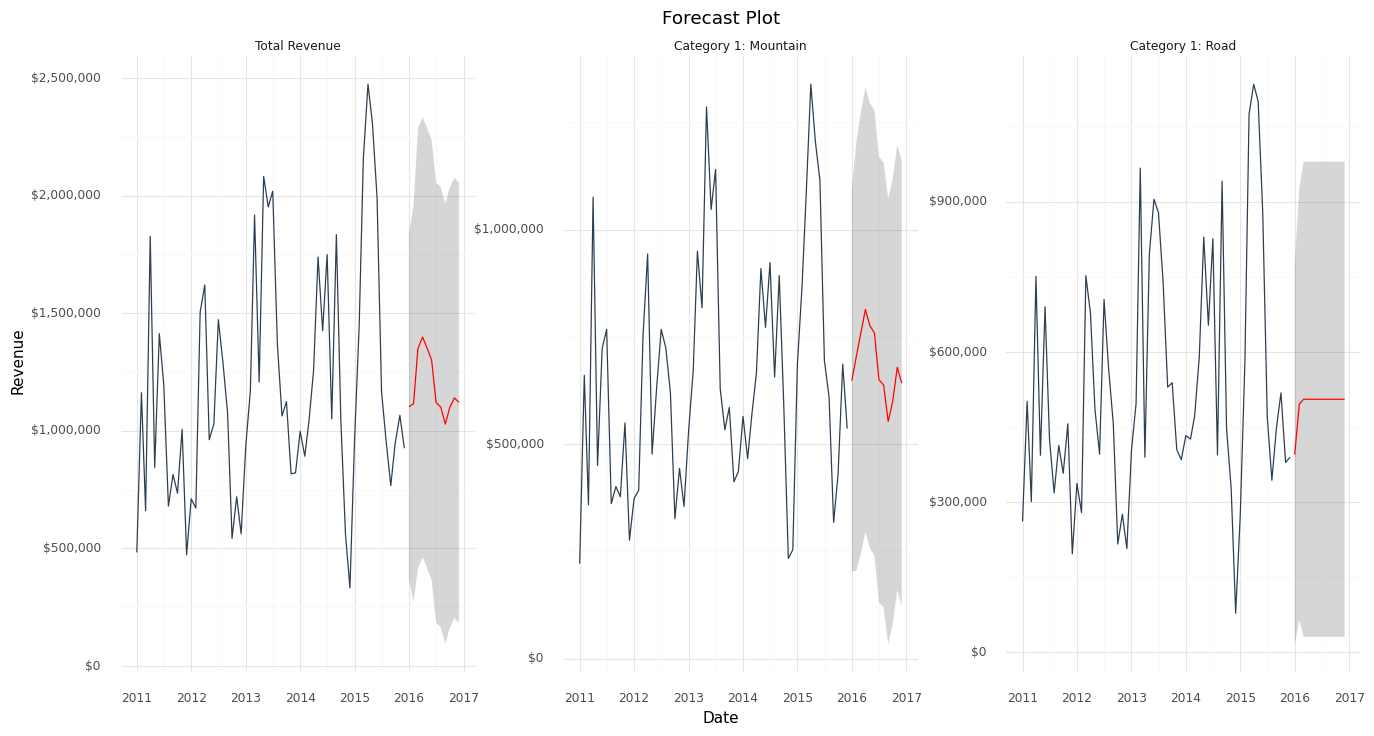

<ggplot: (8768077831081)>

In [30]:
# Plot Forecast

plot_forecast(
        data = forecast_filtered_df,
        date_column = "date",
        id_column = "id",
        facet_ncol = 3
)